# Project: Investigate TMDB movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
<li><a href="#lim">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie DataBase "TMDB" has a lot of informative imformation about data like cast, director, genres and much more. But there is important question that needs good analysis to answer " Which is the most important parameter that determines the vote?".
>
> Is the short movies more favourite than long?
>
> Is there is relation between the favourite movie and the released month?
>
> Is the old movies preferable than the new movies?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# import your dataset 
df=pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Investigation the column data types to ensure that the data is properly existed
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The release data here is existed in strange form also it is not required for the analysis, I just need the to extract the month for further analysis

In [4]:
df['release_month'] = df['release_date'].str.rsplit('/',n=3,expand = True)[:][0]
print(df['release_month'])

0         6
1         5
2         3
3        12
4         4
         ..
10861     6
10862    12
10863     1
10864    11
10865    11
Name: release_month, Length: 10866, dtype: object


#### Find the mean, median, standard deviation

In [5]:
# No need now for the release date so it I will drop it
df.drop(['release_date','homepage','tagline'],axis=1)
# Show the data to ensue that the columns are dropped
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [6]:
df.describe()
# Note that mean ,median and standard deviation is included in the table below.
# Also we can get them in seperate way like in the following code example.

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#df.mean()
#df.median()
df.std()

id              9.213014e+04
popularity      1.000185e+00
budget          3.091321e+07
revenue         1.170035e+08
runtime         3.138141e+01
vote_count      5.756191e+02
vote_average    9.351418e-01
release_year    1.281294e+01
budget_adj      3.430616e+07
revenue_adj     1.446325e+08
dtype: float64

From the statistics above there is not any evidence for outliers, so let us check if there any dublicates or null values

### Data Cleaning

In [8]:
# Checking the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64

The fields that contatin the nulls will not affect the analysis so we can keep it existed.
we can remove it using dropna() function if needed.

In [9]:
# Checking the duplicated values
df.duplicated().sum()

1

In [10]:
# Removing the duplicate record even it doesn't have notice impact in this case but also it is meaningless to keep it existed
df = df.drop_duplicates()
# Printing the sum of duplicates to ensure that it is removed from the data
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Is the short movies more favourite than long?

In [11]:
np_runtime = df['runtime'].to_numpy()
np_vote_average = df['vote_average'].to_numpy()
print(np_runtime)
print(np_vote_average)

[124 120 119 ...  94  80  74]
[6.5 7.1 6.3 ... 6.5 5.4 1.5]


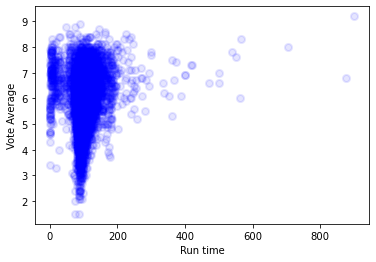

In [12]:
plt.scatter(np_runtime,np_vote_average,c ="blue",linewidths = 2,s = 50,alpha = 0.1)
 
plt.xlabel("Run time")
plt.ylabel("Vote Average")
plt.show()

It seems that there are still outliers so I will treat them in the graph by selecting specific range to focus on

In [13]:
graph_1 = [np_runtime,np_vote_average]
print(graph_1[1])

[6.5 7.1 6.3 ... 6.5 5.4 1.5]


In [14]:
# Using function to determine the maximum limit of the runtime 
def higher_limit():
    print ("Please determine the maximum limit of the movies runtime")
    global hl
    hl = int(input())
    return hl

In [15]:
# Define the suitable for your analysis
higher_limit()

Please determine the maximum limit of the movies runtime
200


200

In [16]:
# Testing the function is working well
hl

200

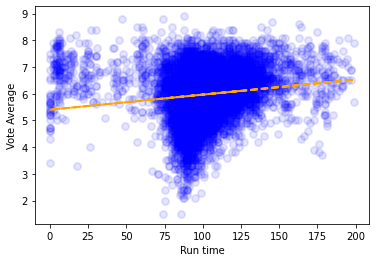

In [17]:
graph_1 = [np_runtime,np_vote_average]
plt.scatter(graph_1[0][graph_1[0]<hl],graph_1[1][graph_1[0]<hl],c ="blue",linewidths = 2,s = 50,alpha = 0.1)
 
plt.xlabel("Run time")
plt.ylabel("Vote Average")
# Calculate the trendline
z = np.polyfit(graph_1[0][graph_1[0]<hl], graph_1[1][graph_1[0]<hl], 1)
Trend_Line = np.poly1d(z)

# Add trendline to plot
plt.plot(graph_1[0][graph_1[0]<hl], Trend_Line(graph_1[0][graph_1[0]<hl]),color="Orange", linewidth=2, linestyle="--")
plt.show()

In [18]:
# The most frequent movie run time
st.mode(graph_1[0])

90

It seems that the most of range of run time of the movies is between [70:150] minutes, Also there is weak positive corelation between the voting and run time.

### Is there is relation between the favourite movie and the released month?

In [19]:
# Make sub data for some quick analysis and graph for the second graph
df2 = df[['release_month','vote_average']]

# Grouping using the release_month to get the sum of vote average corresponded to the repeated months
df2_count = df2.groupby('release_month')['vote_average'].count()
df2_count

release_month
1      919
10    1153
11     814
12     985
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
Name: vote_average, dtype: int64

In [20]:
# Grouping using the release_month to get the sum of vote average corresponded to the repeated months
df2_sum = df2.groupby('release_month')['vote_average'].sum()
df2_sum

release_month
1     5395.1
10    6871.7
11    4935.0
12    6096.6
2     4089.7
3     4872.9
4     4682.8
5     4828.1
6     4972.0
7     4736.8
8     5361.2
9     8076.6
Name: vote_average, dtype: float64

In [21]:
# Adding the average using the sum and the count calculated above then adding them to the dataframe
graph_2 = round(df2_sum/df2_count,2)
print (graph_2)

release_month
1     5.87
10    5.96
11    6.06
12    6.19
2     5.92
3     5.93
4     5.88
5     5.97
6     6.01
7     5.93
8     5.84
9     6.07
Name: vote_average, dtype: float64


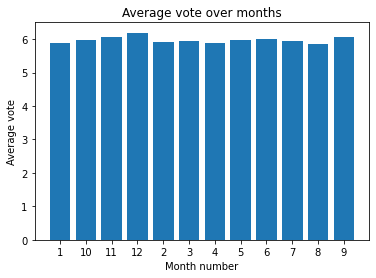

In [22]:
plt.bar(graph_2.index,graph_2)
plt.title('Average vote over months')
plt.xlabel('Month number')
plt.ylabel('Average vote')
plt.show()

The last quarter of the year has high average vote, espically the last monthe in the year.

### Is the old movies preferable than the new movies?

In [23]:
# Make sub data for some quick analysis and graph for the second graph
df3 = df[['release_year','vote_average']]

# Grouping using the release_month to get the sum of vote average corresponded to the repeated months
df3_count = df3.groupby('release_year')['vote_average'].count()
df3_count

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: vote_average, dtype: int64

In [24]:
# Grouping using the release_month to get the sum of vote average corresponded to the repeated months
df3_sum = df3.groupby('release_year')['vote_average'].sum()
df3_sum

release_year
1960     202.4
1961     197.6
1962     203.0
1963     215.2
1964     260.9
1965     216.8
1966     281.9
1967     249.7
1968     248.8
1969     184.8
1970     263.1
1971     353.1
1972     261.4
1973     368.7
1974     300.6
1975     281.2
1976     298.0
1977     350.4
1978     398.5
1979     359.6
1980     480.5
1981     505.6
1982     505.6
1983     477.7
1984     630.4
1985     673.3
1986     726.6
1987     766.1
1988     865.0
1989     831.6
1990     791.2
1991     799.9
1992     808.8
1993    1076.9
1994    1093.4
1995    1059.8
1996    1203.8
1997    1149.8
1998    1253.8
1999    1351.3
2000    1335.3
2001    1426.9
2002    1588.9
2003    1666.6
2004    1838.5
2005    2135.4
2006    2424.1
2007    2612.4
2008    2941.7
2009    3121.6
2010    2930.5
2011    3217.6
2012    3410.3
2013    3875.3
2014    4144.5
2015    3702.1
Name: vote_average, dtype: float64

In [25]:
# Adding the average using the sum and the count calculated above then adding them to the dataframe
graph_3 = round(df3_sum/df3_count,2)
print (graph_3)

release_year
1960    6.32
1961    6.37
1962    6.34
1963    6.33
1964    6.21
1965    6.19
1966    6.13
1967    6.24
1968    6.38
1969    5.96
1970    6.42
1971    6.42
1972    6.53
1973    6.70
1974    6.40
1975    6.39
1976    6.34
1977    6.15
1978    6.13
1979    6.31
1980    6.16
1981    6.17
1982    6.24
1983    5.97
1984    6.00
1985    6.18
1986    6.00
1987    6.13
1988    5.97
1989    6.07
1990    5.99
1991    6.01
1992    6.08
1993    6.05
1994    5.94
1995    6.06
1996    5.90
1997    5.99
1998    5.97
1999    6.03
2000    5.88
2001    5.90
2002    5.97
2003    5.93
2004    5.99
2005    5.87
2006    5.94
2007    5.96
2008    5.93
2009    5.86
2010    5.99
2011    5.96
2012    5.80
2013    5.88
2014    5.92
2015    5.89
Name: vote_average, dtype: float64


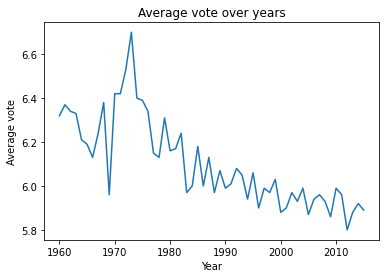

In [26]:
plt.plot(graph_3.index,graph_3)
plt.title('Average vote over years')
plt.xlabel('Year')
plt.ylabel('Average vote')
plt.show()

In [27]:
# Getting the year for the maximum average vote
graph_3.index[graph_3.argmax()]

1973

Although the frequency we can see easily decrease in the average vote along the years.

<a id='conclusions'></a>
## Conclusions

1. Most of movies **run time** is **90** minutes.
2. Almost you will enjoy the longer movie than the short movies.
3. The year of 1973 had the best movie ever you may want to see.


<a id='lim'></a>
## Limitations

1. Although the existance of the release year of the movies I think that existing a column contained the movie is white& black or colourful wrill be good dimension to analyze through it.
2. Almost about ten percent of the data of the production companies are null so we need to fill these data if we want to get new perspective related to production companies.

<a id='ref'></a>
## Refrences


> Pandas and numpy Documentation official webstie for the following:
    >
    > rpsliting : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
    >
    > drop:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
    >
    > change data type to numpy : https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html
    >
    > group by : https://realpython.com/pandas-groupby/#:~:text=The%20Hello%2C%20World!%20of%20pandas%20GroupBy,-Now%20that%20you&text=You%20call%20.,to%20perform%20the%20actual%20aggregation.
    >
    > Max value position in an series : https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
    >
    > mode : https://www.javatpoint.com/mode-in-python
    >
    > Global variable for the functions : https://www.w3schools.com/python/python_variables_global.asp
    >
> Matplotlib official website and another websites:
    >
    > for the bar chart: https://datatofish.com/bar-chart-python-matplotlib/
    >
    > Scatter plot : https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
    >
    > Trend line : https://www.statology.org/matplotlib-trendline/

### Thank you